In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings,warnings.filterwarnings('ignore')

#importar matplotlib para que los gráficos aparezcan en la misma fila
%matplotlib inline

In [2]:
data = pd.read_csv("train_titanic.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Varibale objetivo: que variable impacto más en las muertes de los pasajeros
# Revisar la cantidad de valores nulos(NaN) dentro de mi base de datos
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 0, 'Sexo')

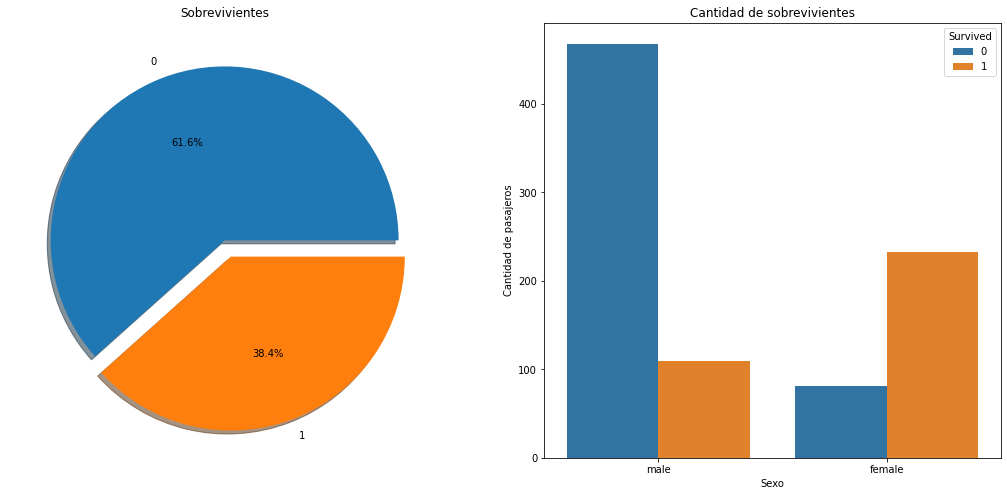

In [5]:
# Cantidad de sobrevivientes

# 0: muertos
# 1: Sobrevivientes
f, ax = plt.subplots(1, 2, figsize = (18,8))

# Contar los pasajeros que sobrevivieron o fallecieron. Se muestran los resultados como gráfico de torta
# explode => separación de los datos en el gráfico
# shadow => Agregar sombra al gráfico
data['Survived'].value_counts().plot.pie(autopct = '%1.1f%%', ax = ax[0], explode = [0, 0.1], shadow = True)
ax[0].set_title('Sobrevivientes')
ax[0].set_ylabel('') # eje Y vacío


# Gráfico 2
# hue => La forma como se van a agrupar los datos. en este caso se agruparán por sobrevivientes
sns.countplot('Sex', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Cantidad de sobrevivientes')
ax[1].set_ylabel('Cantidad de pasajeros')
ax[1].set_xlabel('Sexo')


# Analizando los gráficos el sexo es una variable que afecto la sobreviviencia
# (La cantidad de mujeres que sobrevivieron fue mayor al de los hombres)
# (La cantidad de hombres que murieron fue mayor (>400) en comparacion con las mujeres (<100))


# Analisis de Características

Características categorias:

Una variable categórica es aquell que tiene dos o más categorías y ada valor en esa característica puede clasificare por ella. Por ejemplo, el genero es una variable categorica que tiene dos categorias (masculina y feminina). No podemos dar ningún oeden a tales variables. Tambien se conocen como variables nominales.

* **Categorical Features in the dataset: SEX**

Caracteristicas ordinales:

Una variable ordinal es similar a los valores categoricos, pero la diferencia entre ellos es que podemos tener una ordenación u ordenación relativa entre lso valores. Por ejemplo: si tenemos una característica como Altura con vaores Alto, Medio, Corto, entonces altura es una variable ordinal. Aquí podemos tener una ordenación relativa en la variable.

* **Ordinal Features in the dataset: PClass**

Características continua:

Se dice que una característica es continua si puede tomar valores entre dos puntos o entre los valores minimos o maximos en la columna de características.

* **Continuos Features in the dataset: Age**

Análisis de Características

* _Analizando variable sexo categórica_

In [6]:
# Cantidad total de pasajeros
data['PassengerId'].count()

891

In [7]:
# Cuantas personas sobrevivieron del sexo masculino y femenico
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
# Agrupar los datos segun sexo y supervivencia
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

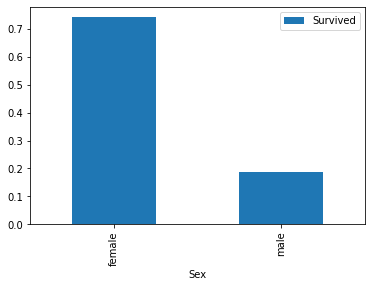

In [9]:
# Gráfico con el promedio de mujeres y hombres que sobrevivieron
data[ ['Sex','Survived'] ].groupby(['Sex']).mean().plot.bar()
plt.show()
# Segun el gráfico, mas del 70% (tasa de superviviencia 75%) de las mujeres sobrevivieron. Y de los hombres un 20% sobrevivio

### Analizando variable ordinal PClass (Clase del pasajero)

In [10]:
# Grafico cruzado
#  margins = true => Para mostrar el total
# Agregar estilos para ver los datos con mayores cantidades (relevantes)
pd.crosstab( data['Pclass'], data['Survived'] , margins=True ).style.background_gradient(cmap = 'summer_r')
  

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 0, 'Clase del pasajero')

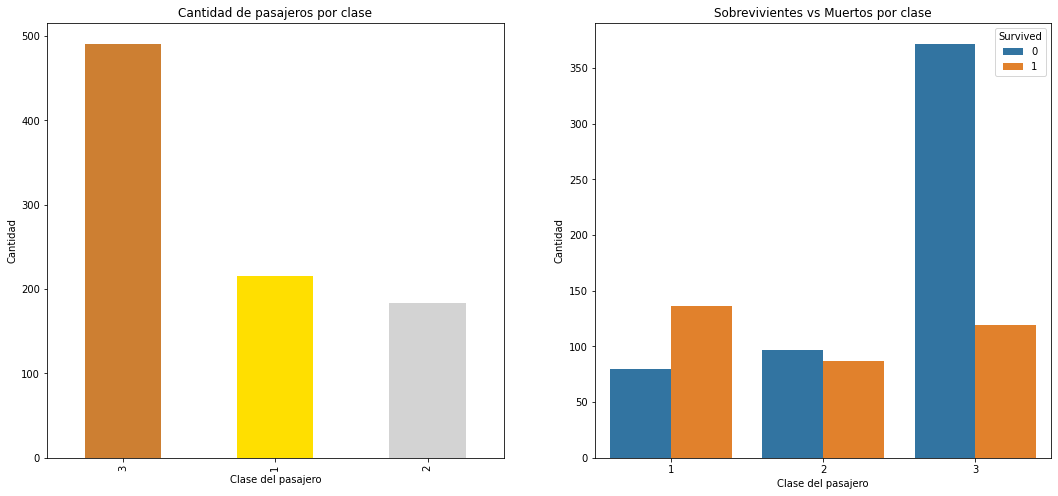

In [11]:
# Gráficos:
#   Cantidad de pasajero por clase
#   Cuantos vivieron y murieron por clase

# En 1 fila, 2 graficos de 18x8
f, ax = plt.subplots(1,2, figsize = (18,8))

# Grafico de barra - Cantidad de pasajero por clase
data['Pclass'].value_counts().plot.bar( ax = ax[0], color = ['#CD7F32','#FFDF00','#D3D3D3'] )
ax[0].set_title('Cantidad de pasajeros por clase')
ax[0].set_ylabel('Cantidad')
ax[0].set_xlabel('Clase del pasajero')


sns.countplot( 'Pclass', hue='Survived', data = data, ax = ax[1] )
ax[1].set_title('Sobrevivientes vs Muertos por clase')
ax[1].set_ylabel('Cantidad')
ax[1].set_xlabel('Clase del pasajero')

# en primera y segunda clase hubo una prioridad en el rescate, no asi en la tercera clase
# En tercera clase solo sobrebvivio un 25% de los pasajeros
# En primera clase aprox un 60% de los pasajeros sobrevivieron y en segunda un 50%

# Podemos concluir que la clase del pasajero es una caracteristica relevante en su superviviencia.


### Analizar la tasa de supervivencia según sexo y clase

In [12]:
pd.crosstab( [data['Sex'], data['Survived']], data['Pclass'], margins=True).style.background_gradient(cmap='Blues')


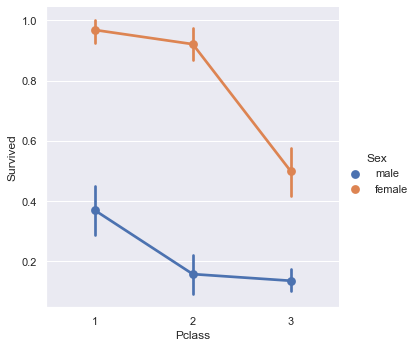

In [13]:
# factorplot : deprecated
# Usar
sns.set_theme(style="darkgrid")
sns.factorplot('Pclass','Survived', hue='Sex', data= data)
plt.show()

# La tasa de superviviencia de las mujeres en relación al sexo y la clase donde viajaron si importaban
# Independiente de la clase, las mujeres tenían la prioridad a la hora del rescate

### Analizar el pasaje (característica continua)

In [14]:
print('El pasaje más caro (dólares):', data['Fare'].max()) # 512 dólares
print('El pasaje más caro (dólares):', data['Fare'].min())


El pasaje más caro (dólares): 512.3292
El pasaje más caro (dólares): 0.0


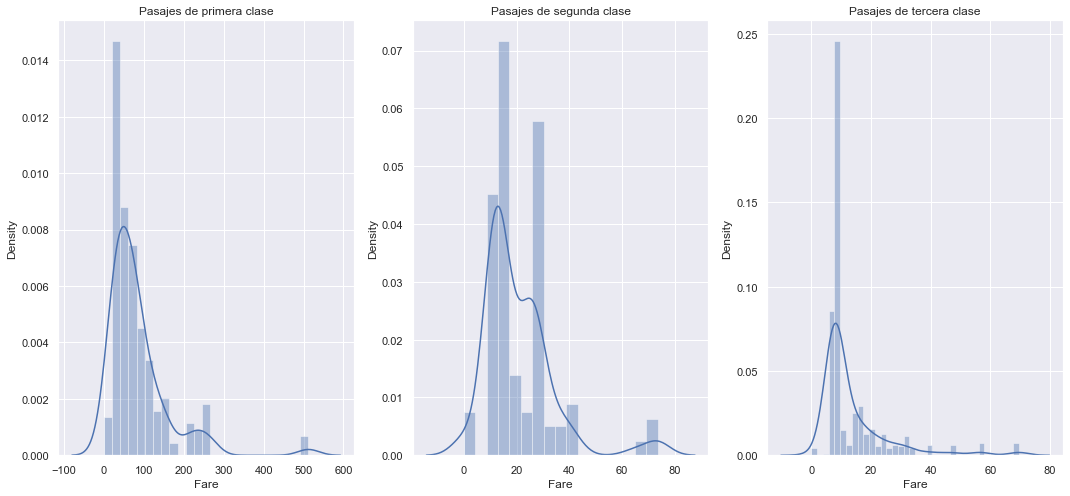

In [15]:
# Distribución de los precios del pasaje según las clases (Gráfico de frecuencia)

f, ax = plt.subplots(1, 3, figsize = (18,8) )

# Gráfico 1. Precios de pasajes de primera clase
sns.distplot( data[data['Pclass'] == 1]['Fare'], ax = ax[0] )
ax[0].set_title('Pasajes de primera clase')

# Gráfico 2. Precios de pasajes de primera clase
sns.distplot( data[data['Pclass'] == 2]['Fare'], ax = ax[1] )
ax[1].set_title('Pasajes de segunda clase')

# Gráfico 3. Precios de pasajes de primera clase
sns.distplot( data[data['Pclass'] == 3]['Fare'], ax = ax[2] )
ax[2].set_title('Pasajes de tercera clase')

plt.show()

# Precios primera clase desde los 100.000 dólares
# Precios segunda clase desde los 10.000 a 40.000
# Precios tercera clase los datos se concentran desde los 10.000 dolares



### Limpeza de Datos

* Convertir variables continuas a rangos (edad y precio del pasaje)
* Convertir valores String en valores númericos
* Eliminar características innecesarias
* Corregir valores nulos.

* **Rango de edad**

In [18]:
# Convertir variables continuas a rangos - EDAD
# Agrupación de informarción => Binning o Normalización
data['rango_edad'] = 0

# Columna rango de edad
data.loc[ data['Age'] <= 16, 'rango_edad' ] = 0
data.loc[ (data['Age'] > 16) & (data['Age'] <= 32), 'rango_edad' ] = 1
data.loc[ (data['Age'] > 32) & (data['Age'] <= 48), 'rango_edad' ] = 2
data.loc[ (data['Age'] > 48) & (data['Age'] <= 64), 'rango_edad' ] = 3
data.loc[ data['Age'] > 64, 'rango_edad' ] = 4

In [19]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,rango_edad
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [22]:
# Comprobar número de pasajeros en cada rango
data['rango_edad'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,rango_edad
1,346
0,277
2,188
3,69
4,11


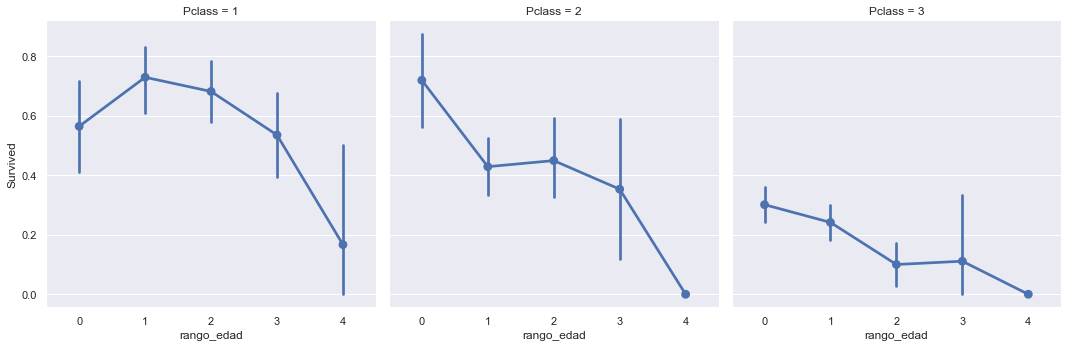

In [23]:
# Gráfico para ver por tramo de edad la supervivencia y agrupada por la clase del pasajero
sns.factorplot('rango_edad', 'Survived', data = data, col = 'Pclass')

# La tasa de supervivencia disminuye a medida qu aumenta la edad, independiente de la clase en la que viajó el pasajero

* **Precio del pasaje**

In [24]:
# La función qcut, permite dividir en rangos o intervalos una variable númerica
data['rango_pasaje'] = pd.qcut(data['Fare'], 4) # 4=> subdividir en 4 tramos

In [27]:
# Agrupar la información del rango pasaje y combinarla con la variable objetivo Survived

# Se obtiene el promedio de registros de cada categoría, pero podemos aplicar otras funciones como sum(), count(), entre otras.

data.groupby(['rango_pasaje'])['Survived'].mean().to_frame().style.background_gradient(cmap='Greens')

,Survived
rango_pasaje,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [32]:
data['categoria_pasaje'] = 0

# Uso del rango de precios del pasaje para generar la categoria_pasaje
data.loc[ data['Fare'] <= 7.91, 'categoria_pasaje' ] = 0
data.loc[ (data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'categoria_pasaje' ] = 1
data.loc[ (data['Fare'] > 14.454) & (data['Fare'] <= 31.0), 'categoria_pasaje' ] = 2
data.loc[ (data['Fare'] > 31.0) & (data['Fare'] <= 512.329), 'categoria_pasaje' ] = 3

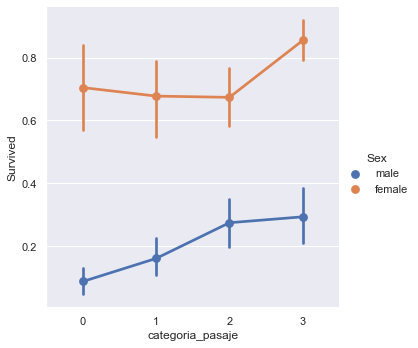

In [33]:

sns.factorplot('categoria_pasaje', 'Survived', data = data, hue = 'Sex')
# A medida que aumenta la categoria del pasaje aumenta la tasa de supervivencia
# Las mujeres que compraron pasajes mas caros aseguraban su supervivencia